# Lab 1
# Introduction to basic concepts
# ---------------------------------------------------

This practice is focused on familiarizing the student with basic concepts of automatic learning: introduction, data visualization, pre-processing, data cleaning and generation of training and test subsets.

## 1.- Data set description - "Pima Indian Diabetes" 

 In this data set the goal is to predict, based on diagnostic measurements, whether a patient has diabetes. All patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

#### Questions: Taking into account the above description of the "Pima Indian Diabetes" database, please justify your answer to the following questions without using any software: 

1.1. Could you directly use any of the variables as the desired output of a classifier?
What would be the purpose of the classifier? Explain which variable (or variables) you would use as input data to the classifier.

*Here we have a supervised learning (classification problem where 1= diabetes and 0= no diabetes). The output of a classification problem should be discrete. 

1.2 Could you use directly (without applying pre-processing) any of the variables provided in the data set as desired output to build a regressor?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
#Loading our adta
data = pd.read_csv("pima_indian_diabetes.csv") #we can change this database file if we want
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
#Describing the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


After carrying out the description of the data, we can observe that there are null variables. For example in glucose levels, there are 0 values and this is not realistic at all. Therefore, it will be necessary to perform a pre-processing, to get the best quality possible in our data.

In [4]:
#Number of entries in the dataset
print(data.shape)

(768, 9)


In [5]:
#total number of unique values per variable (pregnancies, glucose, bloodpressure....)
print(data.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [6]:
#I want to see how many values compose each value of pregnancy
# 1 time -pregant = 135 women that have been pregnant 1 time etc
data["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [7]:
data["Outcome"].value_counts()
# 0 = 500 women with no diabetes
# 1 = 268 women with diabetes

#We have an unbalanced database because there is a high difference between the nº of women with diabetes
# and the nº of women without diabetes --> it's important to have a balanced database!!

0    500
1    268
Name: Outcome, dtype: int64

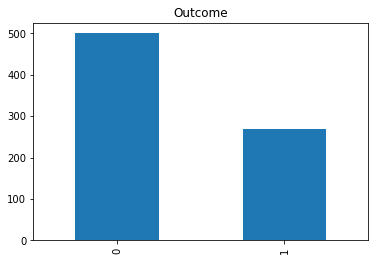

In [8]:
#Plot the number of cases (with diabetes) and control (with no diabetes)
data['Outcome'].value_counts().plot.bar(title="Outcome")

In this cell we are able to see a big difference between two outcomes, so maybe there is a problem with the dataset, being unbalanced. This fact could severly affect the quality of our data. 


In [9]:
#for each outcome, we have the nº of times a women have been pregnant
data.groupby(['Outcome', 'Pregnancies']).mean()

Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome Pregnancies                                                         
0       0            111.945205      69.205479      21.054795   77.561644   
        1            104.254717      66.830189      23.047170   84.320755   
        2            105.214286      61.940476      20.107143   72.619048   
        3            109.604167      65.708333      17.520833   62.020833   
        4            117.555556      71.577778      18.422222   78.466667   
        5            111.666667      74.666667      17.166667   46.861111   
        6            115.352941      66.382353      18.705882   69.029412   
        7            121.000000      70.350000      19.350000   72.500000   
        8            106.625000      75.312500      12.937500   14.500000   
        9            107.000000      70.400000      22.400000   71.200000   
        10           117.571429      72.857143      10.571429   25.071429   
        11           113.250000      81.000000      10.000000    0.000000   
        12           111.000000      80.200000      24.600000   31.800000   
        13           117.200000      74.400000      22.000000   50.000000   
1       0            144.236842      63.210526      24.605263   89.578947   
        1            143.793103      71.310345      29.517241  151.137931   
        2            135.473684      69.052632      28.210526  144.315789   
        3            148.444444      68.148148      24.629630  132.666667   
        4            139.913043      67.000000      10.913043   51.782609   
        5            131.190476      78.857143      17.761905   75.190476   
        6            132.375000      72.750000      15.375000   52.000000   
        7            148.800000      71.120000      21.040000   94.040000   
        8            150.000000      75.090909      20.500000  149.772727   
        9            144.944444      82.055556      20.055556   57.555556   
        10           125.600000      66.500000      22.900000   48.400000   
        11           134.000000      70.285714      28.428571  102.857143   
        12           116.750000      71.500000      30.250000  213.500000   
        13           133.800000      73.200000      12.600000    5.800000   
        14           137.500000      70.000000      27.500000   92.000000   
        15           136.000000      70.000000      32.000000  110.000000   
        17           163.000000      72.000000      41.000000  114.000000   

                           BMI  DiabetesPedigreeFunction        Age  
Outcome Pregnancies                                                  
0       0            31.727397                  0.457055  27.095890  
        1            29.616038                  0.451679  25.254717  
        2            29.679762                  0.479881  25.892857  
        3            29.231250                  0.358354  28.770833  
        4            31.255556                  0.410511  30.066667  
        5            31.100000                  0.359278  39.416667  
        6            29.591176                  0.433294  37.147059  
        7            29.975000                  0.405500  42.500000  
        8            30.693750                  0.526750  49.625000  
        9            28.840000                  0.311100  46.000000  
        10           30.114286                  0.411071  43.357143  
        11           37.125000                  0.259000  40.750000  
        12           30.560000                  0.301200  48.200000  
        13           33.280000                  0.405600  46.800000  
1       0            39.213158                  0.643368  28.578947  
        1            37.793103                  0.613759  35.103448  
        2            34.578947                  0.543737  32.947368  
        3            32.548148                  0.563333  29.481481  
        4            33.873913                  0.516478  38.086957  
        5   

If we compare outcome = 0 and pregnancy 1 (with an average insulin level of 77.56) and outcome 1 and pregnancy 1 (with average insulin = 151.14), there is a very high difference!!

# 2. Data visualization, pre-processing and data cleaning
This section deals with the display, pre-processing and data cleaning. Tasks fundamental in any data analysis application.


## 2.1 Visualization

#### Hangs-on! 

a) Visualize the histograms of the variables in the database, choosing a number of intervals suitable for each variable. Justify this choice.


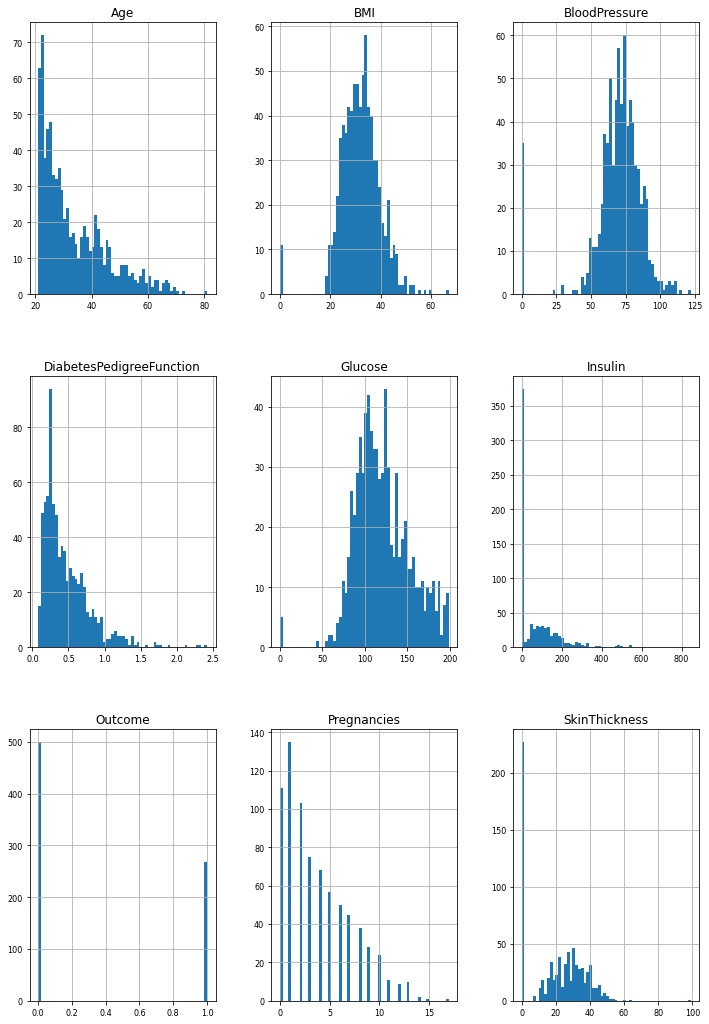

In [10]:
#histogram
answer_a = data.hist(figsize=(12,18), bins = 60, xlabelsize = 8, ylabelsize = 8)
    
#we observe that there are many 0 values, there's sth happening here and we have to figure out what it is

As we have a high number of entries on the data, it is necessary to input a high number of bins, in order to visualize a much more precise and quantitatively histogram. $$ \quad $$ 
For example, if we observe the pregnancies histogram, we are able to differentiate in a better way the entries.

b) Indicate for each variable what type it is (numerical, categorical, etc.).

In [11]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

c) Indicate which variables present null values and justify how you have identified them.


In [12]:
# Missing values? let's look for it

#data.isnull().values.any()
print('Missing values?:',data.isnull().values.any())

Missing values?: False


In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

d) Indicate which variables present anomalous values that could be eliminated and justify how you have identified them. You can rely on other visualization tools not seen in theory, such as the box plots.

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


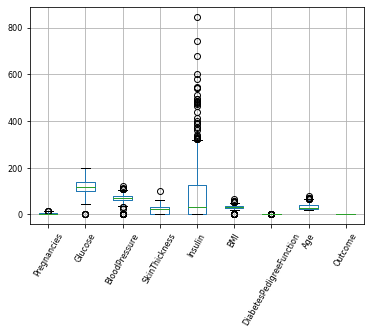

In [14]:
# Identify outliers
col_name = list(data.columns)
print(col_name)
boxplot = data.boxplot(grid=True, rot = 60, fontsize = 8)

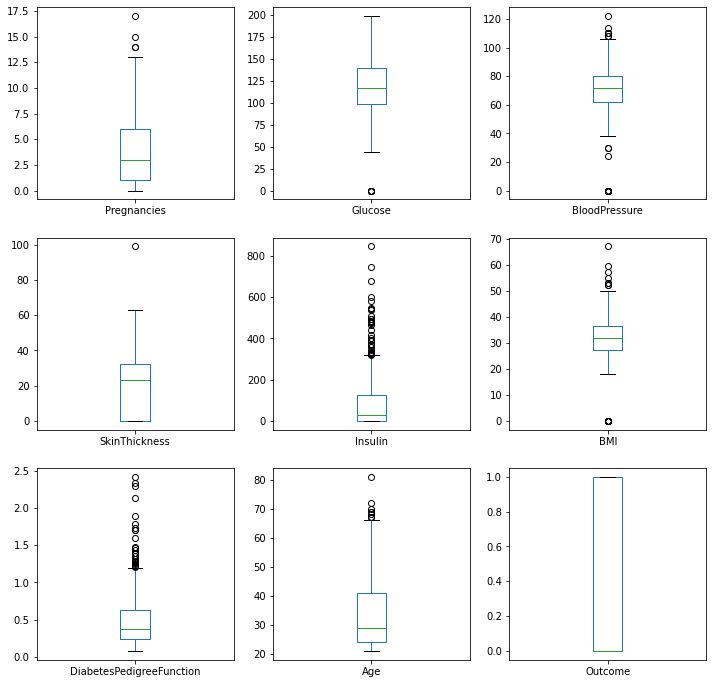

In [15]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex = False, sharey = False, figsize=(12,12))
plt.show() 

#barrers = the max and min limits
#points = the outliers

e) Represent a dispersion matrix generated for some of the variables in the
Are there any pairs of variables that have a linear or non-linear relationship between the two?
Draw the points so that you can differentiate between diabetic and non-diabetic patients
diabetics. Include the scatter matrix in the memory. Without considering the variable
"Outcome", is there a couple of variables that allow to separate these two types of
patients?

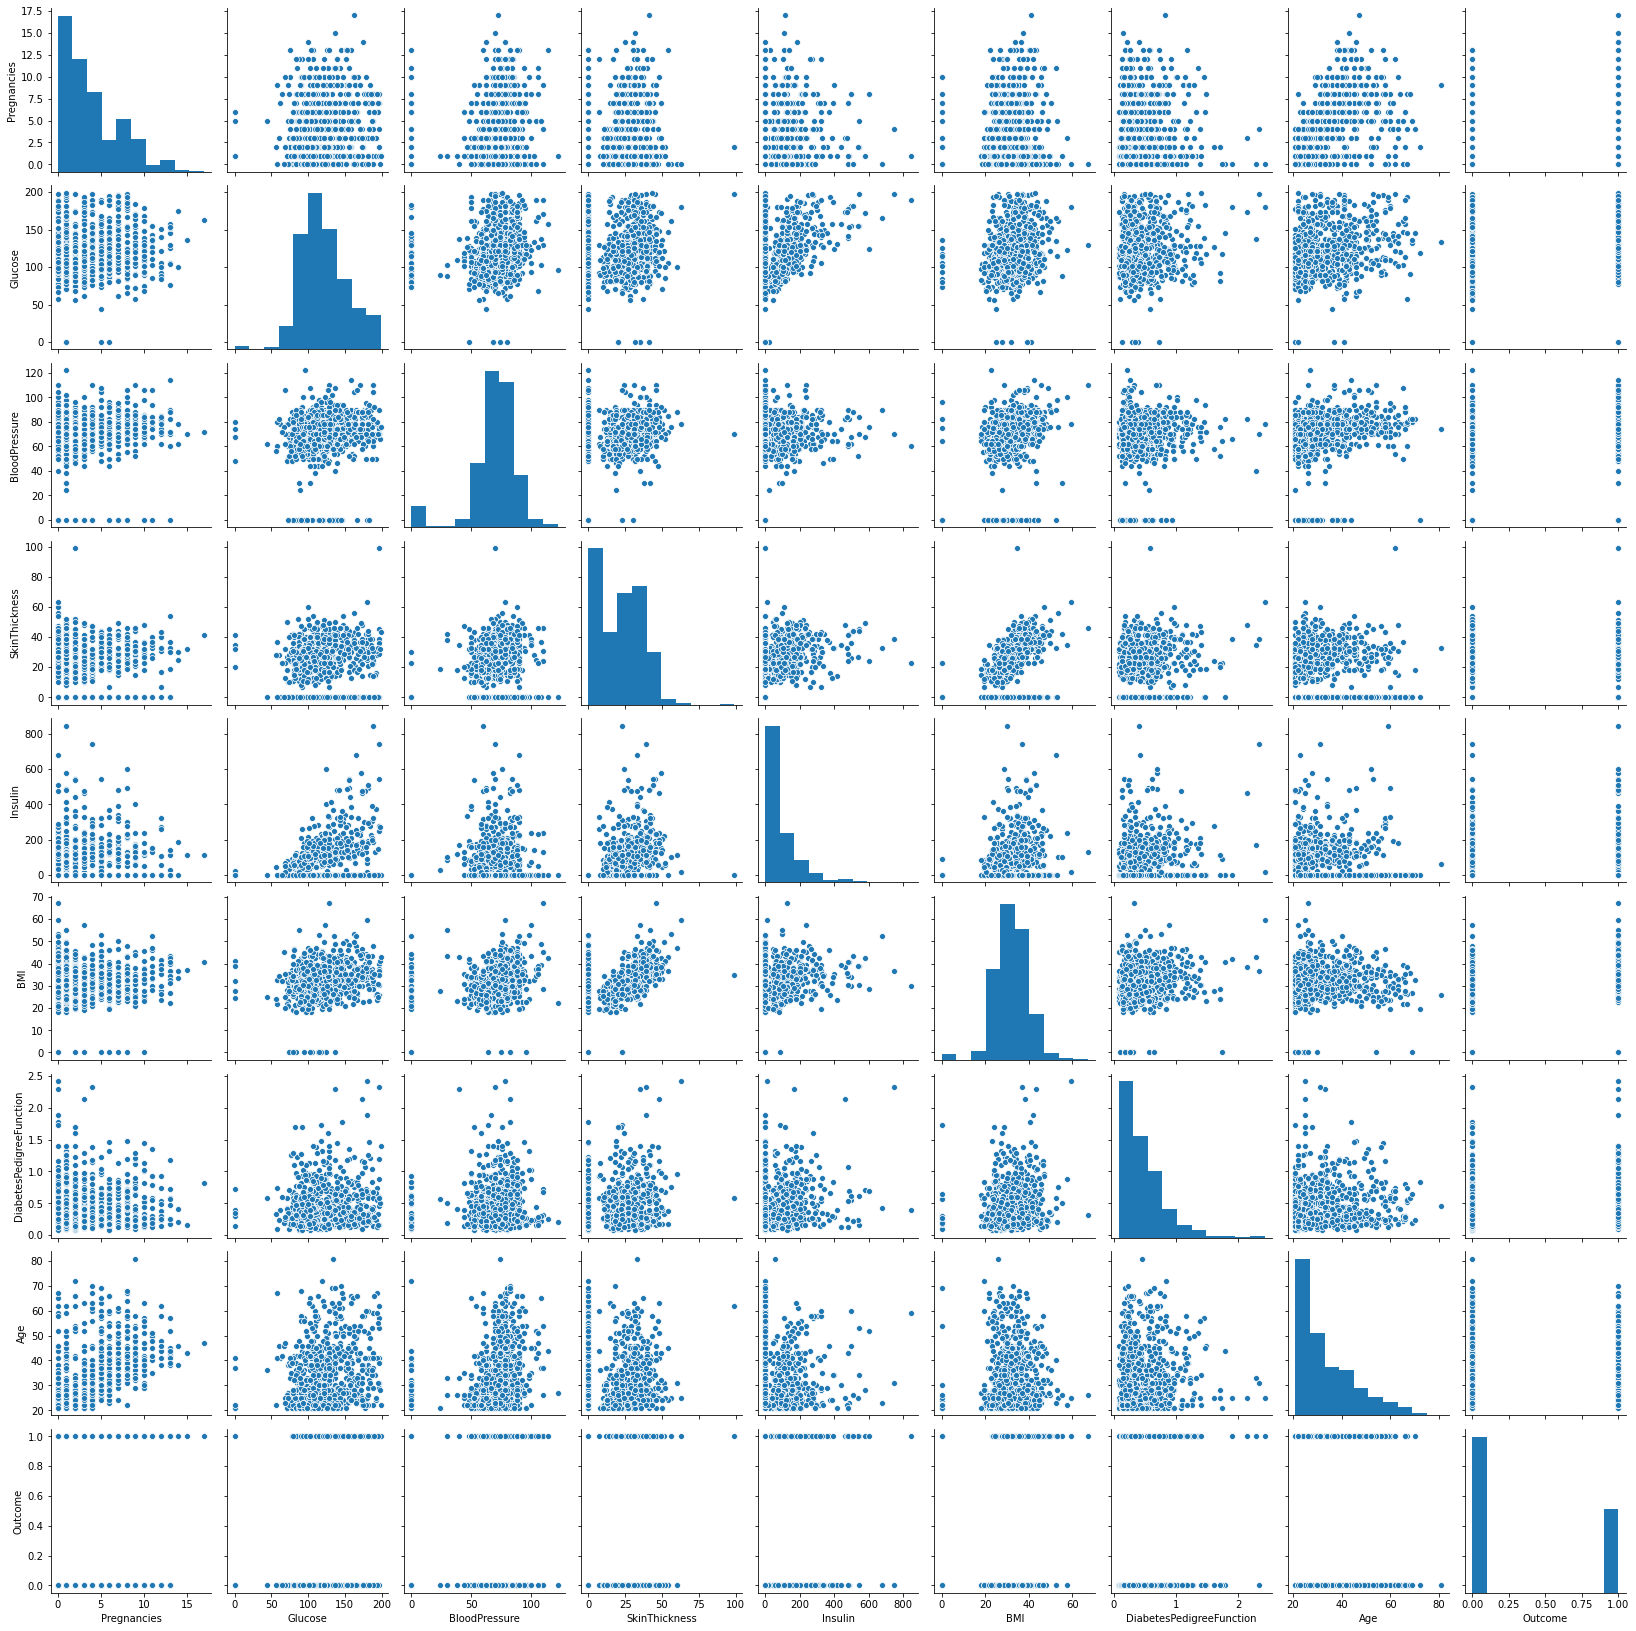

In [16]:
#scatter plots
sns.pairplot(data)

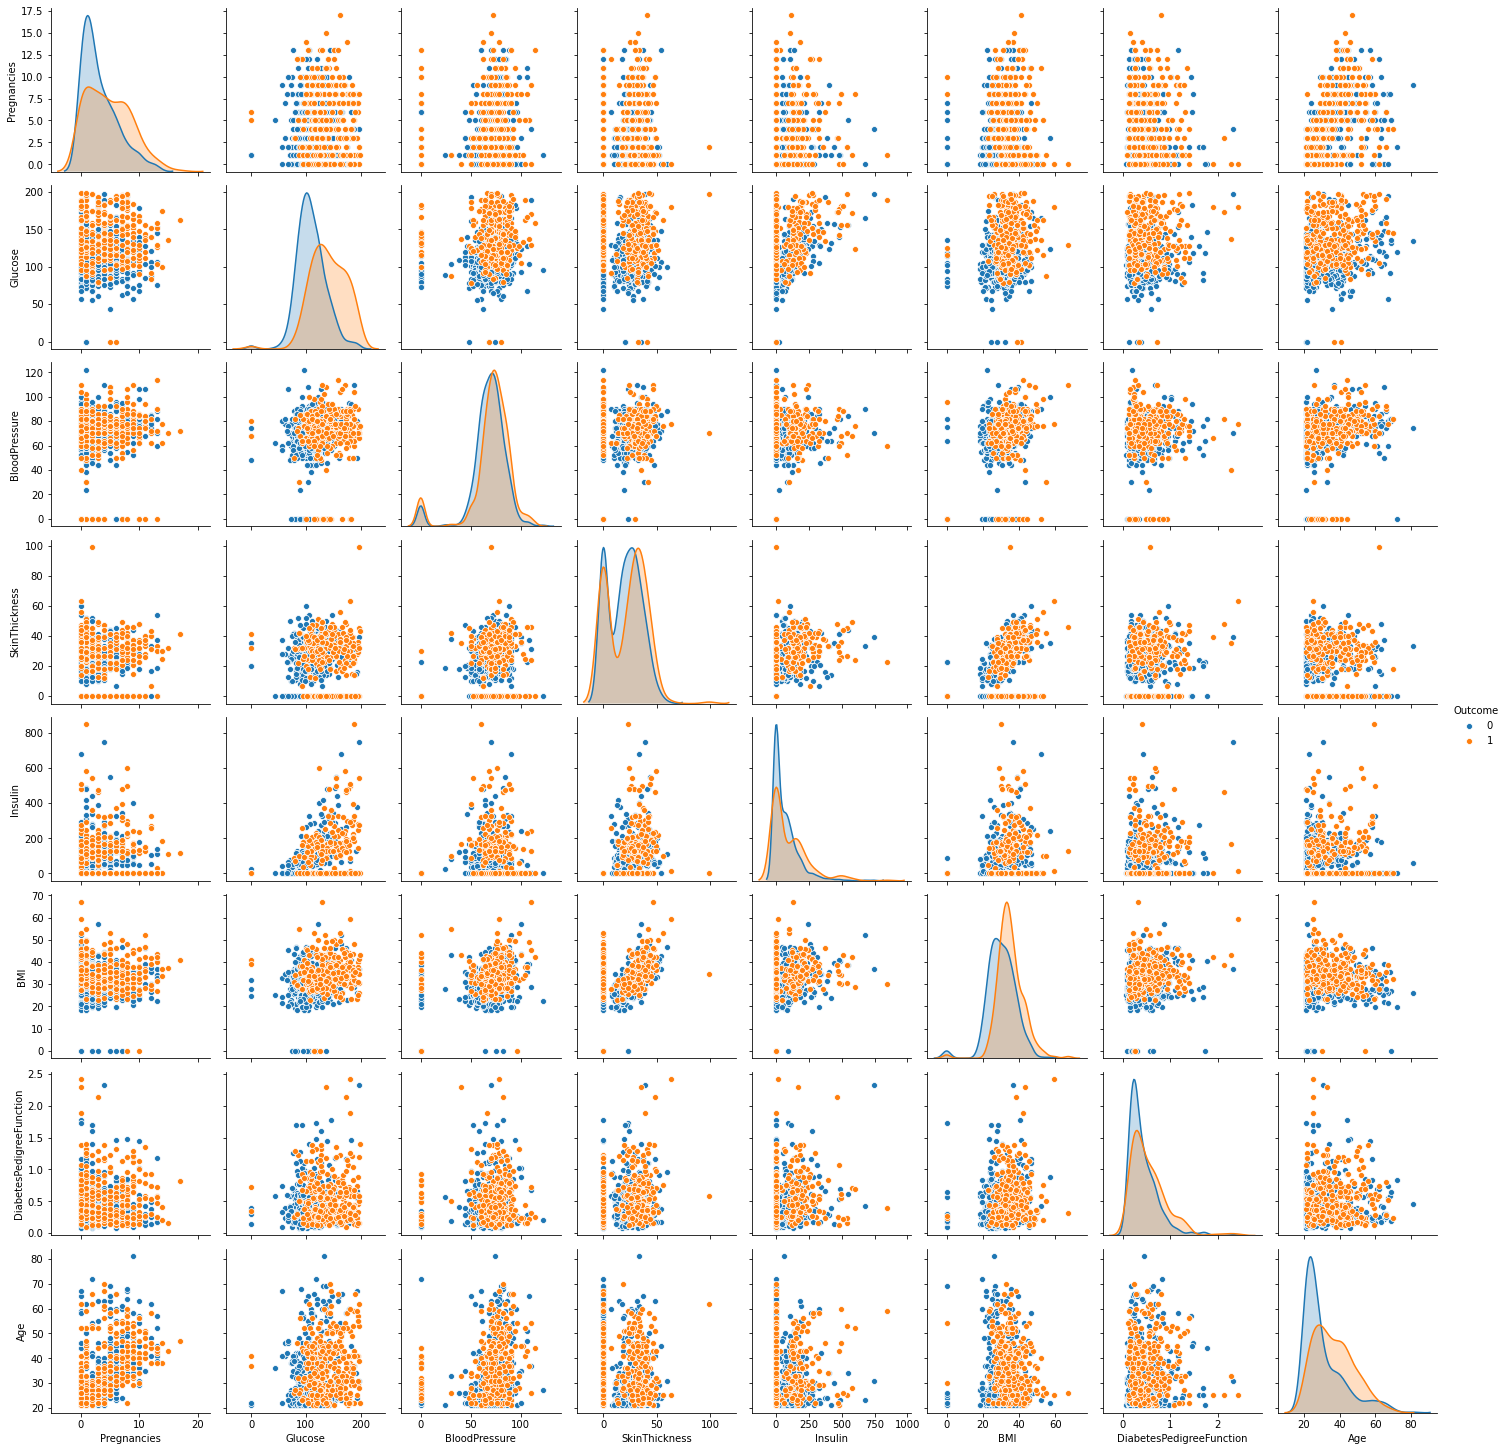

In [17]:
sns.pairplot(data, hue = 'Outcome')

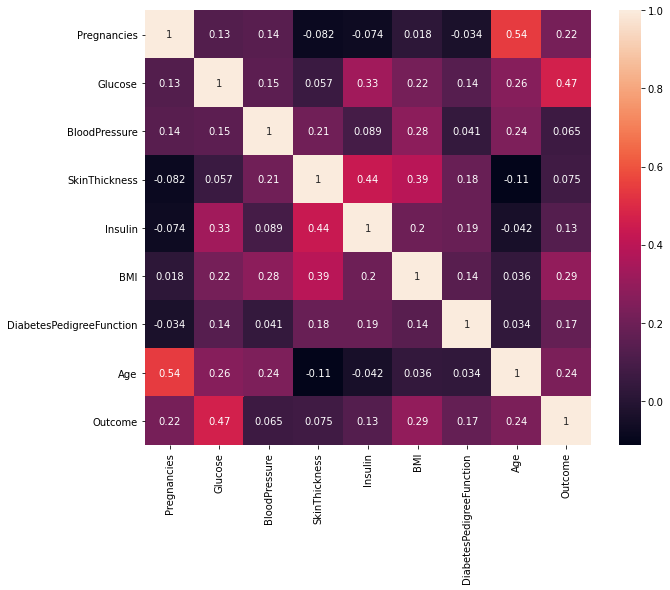

In [18]:
f, ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

#we don't have redundant values because of this linear tendency 

##  2.2 Preprocessing and data cleaning

#### Hangs-on! -- ASSIGMENTS
#### Practice associated to Unit 1 (2.5%)
#### For this lab:

    • Students will upload to Virtual Classroom the Python code associated with that task (2.2 from a) to f)).

    • In addition, they will include only an explanatory video of maximum length 3 minutes with the following file name: UnitX_Surname1_First name1_Surname2_First name2. Both members mustcomment and discuss the results shown in the video.
    
    • Videos longer than 3 minutes will not be evaluated.

a) Based on the histograms, indicate for each variable the number of incorrect or abnormal values (outliers). You can also used the z-score for each sample on the data set and specific a threshold (for example 2.5, 3, 3.5 or more standard deviations).

Explain the procedure followed to obtain this number. In view of the results, detail what process you would follow to to be able to apply machine learning methods on this data set.

#### a) Visualization of all histograms before calculating the outliers

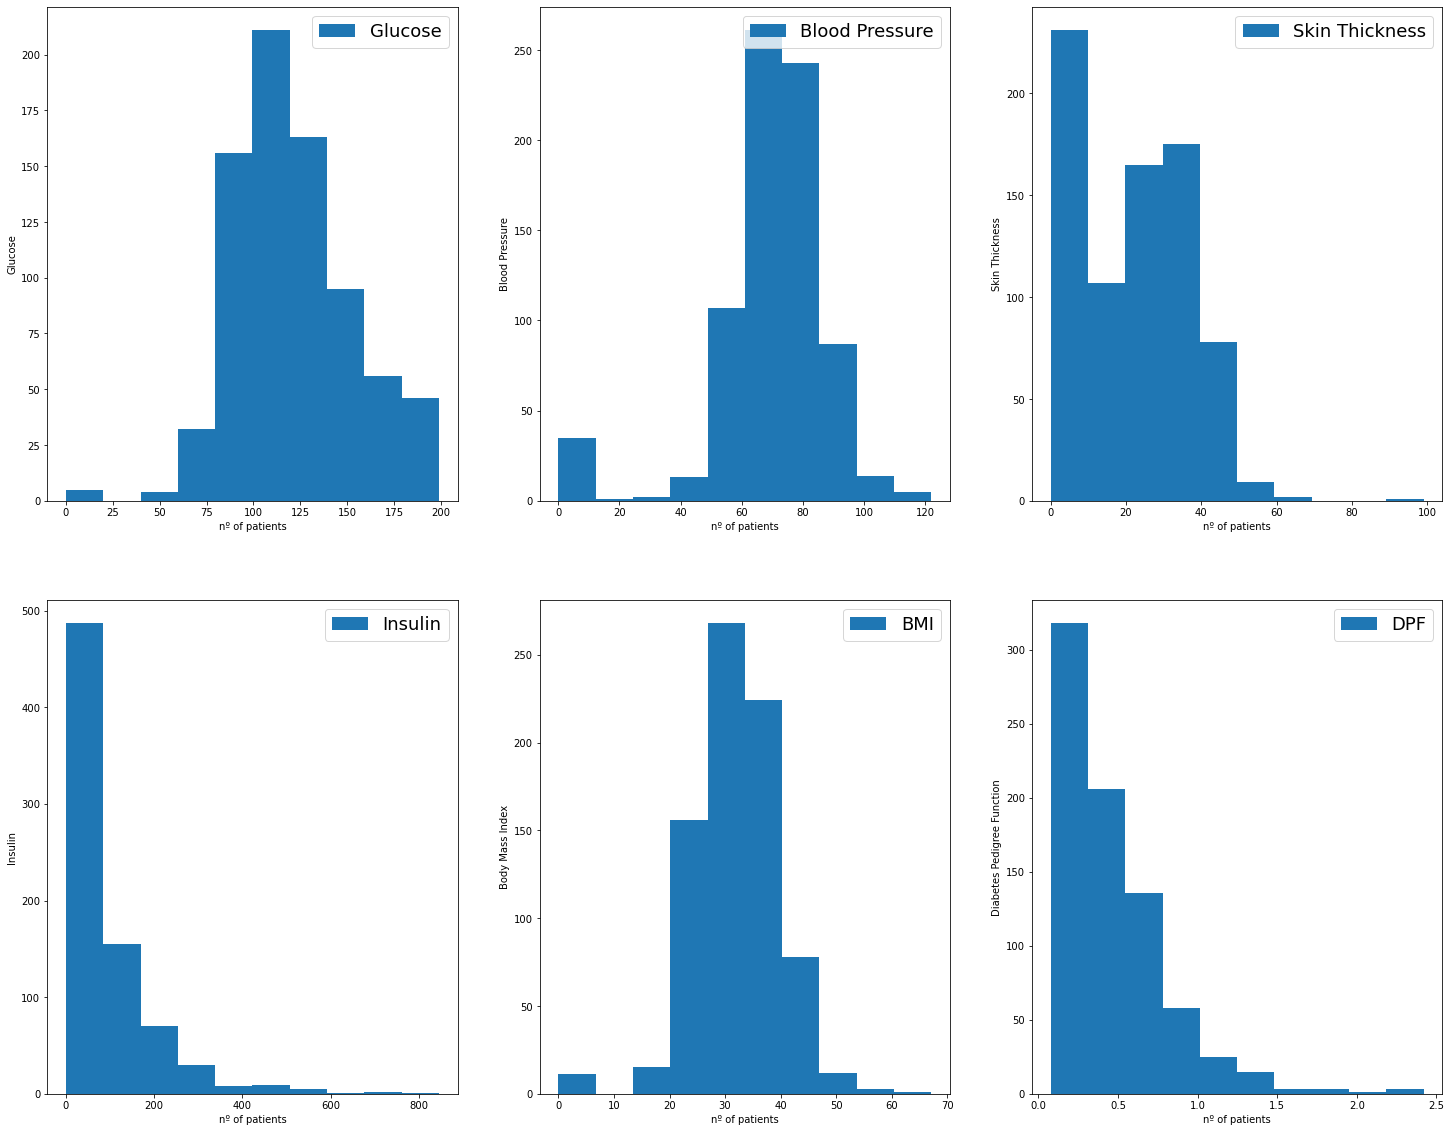

In [20]:
plt.figure(figsize = (25,20))

plt.subplot(2,3,1)
plt.hist(data['Glucose'], label = 'Glucose')
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Glucose')

plt.subplot(2,3,2)
plt.hist(data['BloodPressure'], label = 'Blood Pressure')
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Blood Pressure')


plt.subplot(2,3,3)
plt.hist(data['SkinThickness'], label = 'Skin Thickness')
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Skin Thickness')


plt.subplot(2,3,4)
plt.hist(data['Insulin'], label = 'Insulin')
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Insulin')

plt.subplot(2,3,5)
plt.hist(data['BMI'], label = 'BMI')
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Body Mass Index')

plt.subplot(2,3,6)
plt.hist(data['DiabetesPedigreeFunction'], label = 'DPF')
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Diabetes Pedigree Function')

plt.show()

### a) Z score -calculation of the outliers for each variable
#### a1). Glucose-outliers

In [21]:
outliers_gluc=[]

glucose = data.Glucose.values

mean_gluc = np.mean(glucose)
std_gluc = np.std(glucose)
print('Mean of pregnancies:', mean_gluc, 'Std of pregnancies:', std_gluc)

#Calculation of the outliers
for i in glucose:
    z_gluc=(i-mean_gluc)/std_gluc
    if z_gluc > 3:
        outliers_gluc.append(i)
    if z_gluc < (-3) and i != 0:
        outliers_gluc.append(i)
print('outlier in pregnancies is', len(outliers_gluc))

Mean of pregnancies: 120.89453125 Std of pregnancies: 31.95179590820272
outlier in pregnancies is 0


#### a2). Blood Pressure-outliers

In [22]:
outliers_bp=[]

bp = data.BloodPressure.values

mean_bp = np.mean(bp)
std_bp = np.std(bp)
print('Mean of pregnancies:', mean_bp, 'Std of pregnancies:', std_bp)

#Calculation of the outliers
for i in bp:
    z_bp=(i-mean_bp)/std_bp
    if z_bp > 3:
        outliers_bp.append(i)
    if z_bp < (-3) and i != 0:
        outliers_bp.append(i)
print('outlier in pregnancies is', len(outliers_bp))

Mean of pregnancies: 69.10546875 Std of pregnancies: 19.343201628981696
outlier in pregnancies is 0


#### a3). Skin thickness (SKT)-outliers

In [23]:
outliers_SKT=[]

SKT = data.SkinThickness.values

mean_SKT = np.mean(SKT)
std_SKT = np.std(SKT)
print('Mean of pregnancies:', mean_SKT, 'Std of pregnancies:', std_SKT)

#Calculation of the outliers
for i in SKT:
    z_SKT=(i-mean_SKT)/std_SKT
    if z_SKT > 3:
        outliers_SKT.append(i)
    if z_bp < (-3) and i != 0:
        outliers_SKT.append(i)
print('outlier in pregnancies is', len(outliers_SKT))

Mean of pregnancies: 20.536458333333332 Std of pregnancies: 15.941828626496939
outlier in pregnancies is 1


#### a4). Insuline-outliers

In [24]:
outliers_ins=[]

ins = data.Insulin.values

mean_ins = np.mean(ins)
std_ins = np.std(ins)
print('Mean of pregnancies:', mean_ins, 'Std of pregnancies:', std_ins)

#Calculation of the outliers
for i in ins:
    z_ins=(i-mean_ins)/std_ins
    if z_ins > 3:
        outliers_ins.append(i)
    if z_ins < (-3) and i != 0:
        outliers_ins.append(i)
print('outlier in pregnancies is', len(outliers_ins))

Mean of pregnancies: 79.79947916666667 Std of pregnancies: 115.16894926467262
outlier in pregnancies is 18


#### a5). Body Mass Index(BMI)-outliers

In [25]:
outliers_bmi=[]

BMI = data.BMI.values

mean_bmi = np.mean(BMI)
std_bmi= np.std(BMI)
print('Mean of pregnancies:', mean_bmi, 'Std of pregnancies:', std_bmi)

#Calculation of the outliers
for i in BMI:
    z_bmi=(i-mean_bmi)/std_bmi
    if z_bmi > 3:
        outliers_bmi.append(i)
    if z_bmi < (-3) and i != 0:
        outliers_bmi.append(i)
print('outlier in pregnancies is', len(outliers_bmi))

Mean of pregnancies: 31.992578124999998 Std of pregnancies: 7.87902573154013
outlier in pregnancies is 3


#### a6). Diabetes Pedigree Function (DPF)-outliers

In [26]:

outliers_DPF=[]

DPF = data.DiabetesPedigreeFunction.values

mean_DPF = np.mean(DPF)
std_DPF= np.std(DPF)
print('Mean of pregnancies:', mean_DPF, 'Std of pregnancies:', std_DPF)

#Calculation of the outliers
for i in DPF:
    z_DPF=(i-mean_DPF)/std_DPF
    if z_DPF > 3:
        outliers_DPF.append(i)
    if z_DPF < (-3) and i != 0:
        outliers_DPF.append(i)
print('outlier in pregnancies is', len(outliers_DPF))

Mean of pregnancies: 0.47187630208333325 Std of pregnancies: 0.3311128160286291
outlier in pregnancies is 11


b)  Based on the histograms, indicate for each variable analyzed the number of missing values. Explain the procedure followed for obtaining such number. In view of the results, detail what process you would follow in order to
apply machine learning methods to this data set.

#### b1) Counting the nº of missing values of glucose variable

In [27]:
missing_values1 = []
gluc = data.Glucose.values

for i in gluc:
    if i==0:
        missing_values1.append(i)
print('Number of missing values in glucose:', len(missing_values1))

Number of missing values in glucose: 5


#### b2) Counting the nº of missing values of BP variable

In [28]:
missing_values2 = []
BP = data.BloodPressure.values

for i in BP:
    if i==0:
        missing_values2.append(i)
print('Number of missing values in blood pressure:', len(missing_values2))

Number of missing values in blood pressure: 35


#### b3) Counting the nº of missing values of SKT variable

In [29]:
missing_values3 = []
SKT = data.SkinThickness.values

for i in SKT:
    if i==0:
        missing_values3.append(i)
print('Number of missing values in SKT:', len(missing_values3))

Number of missing values in SKT: 227


#### b4) Counting the nº of missing values of Insulin variable

In [30]:
missing_values4 = []
insulin = data.Insulin.values

for i in insulin:
    if i==0:
        missing_values4.append(i)
print('Number of missing values in insulin:', len(missing_values4))

Number of missing values in insulin: 374


#### b5) Counting the nº of missing values of BMI variable

In [31]:
missing_values5 = []
BMI = data.BMI.values

for i in BMI:
    if i==0:
        missing_values5.append(i)
print('Number of missing values in BMI:', len(missing_values5))

Number of missing values in BMI: 11


#### b6) Counting the nº of missing values of DPF variable

In [32]:
missing_values6 = []
DPF = data.DiabetesPedigreeFunction .values

for i in DPF:
    if i==0:
        missing_values6.append(i)
print('Number of missing values in DPF:', len(missing_values6))

Number of missing values in DPF: 0


c) If any of the analyzed variables present missing values, impute (replace) the
missing values by an attribute-dependent statistician.

#### c1) Replacing missing values of Glucose variable

In [33]:
#replacing the missing values by the mean value of our variable 
gluc_preprocessed=data['Glucose'].replace(to_replace = 0, value = mean_gluc)
missing_values=[]

for i in gluc_preprocessed:
    if i==0:
        missing_values.append(i)
print('Number of missing values in our processed',len(missing_values))


Number of missing values in our processed 0


#### c2) Replacing missing values of BP variable

In [34]:
bp_preprocessed = data['BloodPressure'].replace(to_replace = 0, value = mean_bp)
missing_values2_bp =[]

for i in bp_preprocessed:
    if i==0:
        missing_values2_bp.append(i)
print('Number of missing values in our processed BP:', len(missing_values2_bp))

Number of missing values in our processed BP: 0


#### c3) Replacing missing values of SKT variable

In [35]:
SKT_preprocessed = data['SkinThickness'].replace(to_replace = 0, value = mean_SKT)
missing_values3_skt =[]

for i in bp_preprocessed:
    if i==0:
        missing_values3_skt.append(i)
print('Number of missing values in our processed SKT:', len(missing_values3_skt))

Number of missing values in our processed SKT: 0


#### c4) Replacing missing values of Insulin variable

In [36]:
insulin_preprocessed = data['Insulin'].replace(to_replace = 0, value = mean_ins)
missing_values4_i =[]

for i in insulin_preprocessed:
    if i==0:
        missing_values4_i.append(i)
print('Number of missing values in our processed insulin:', len(missing_values4_i))

Number of missing values in our processed insulin: 0


#### c5) Replacing missing values of BMI variable

In [37]:
BMI_preprocessed = data['BMI'].replace(to_replace = 0, value = mean_bmi)
missing_values5_bmi =[]

for i in BMI_preprocessed:
    if i==0:
        missing_values5_bmi.append(i)
print('Number of missing values in our processed BMI:', len(missing_values5_bmi))

Number of missing values in our processed BMI: 0


d) Visualize again the histograms of the variables after having made the data cleaning. Explain the results obtained. Do you consider it necessary to always perform the imputation of
the missing values? Justify your answer.

#### d1) Visualization preprocessed variables

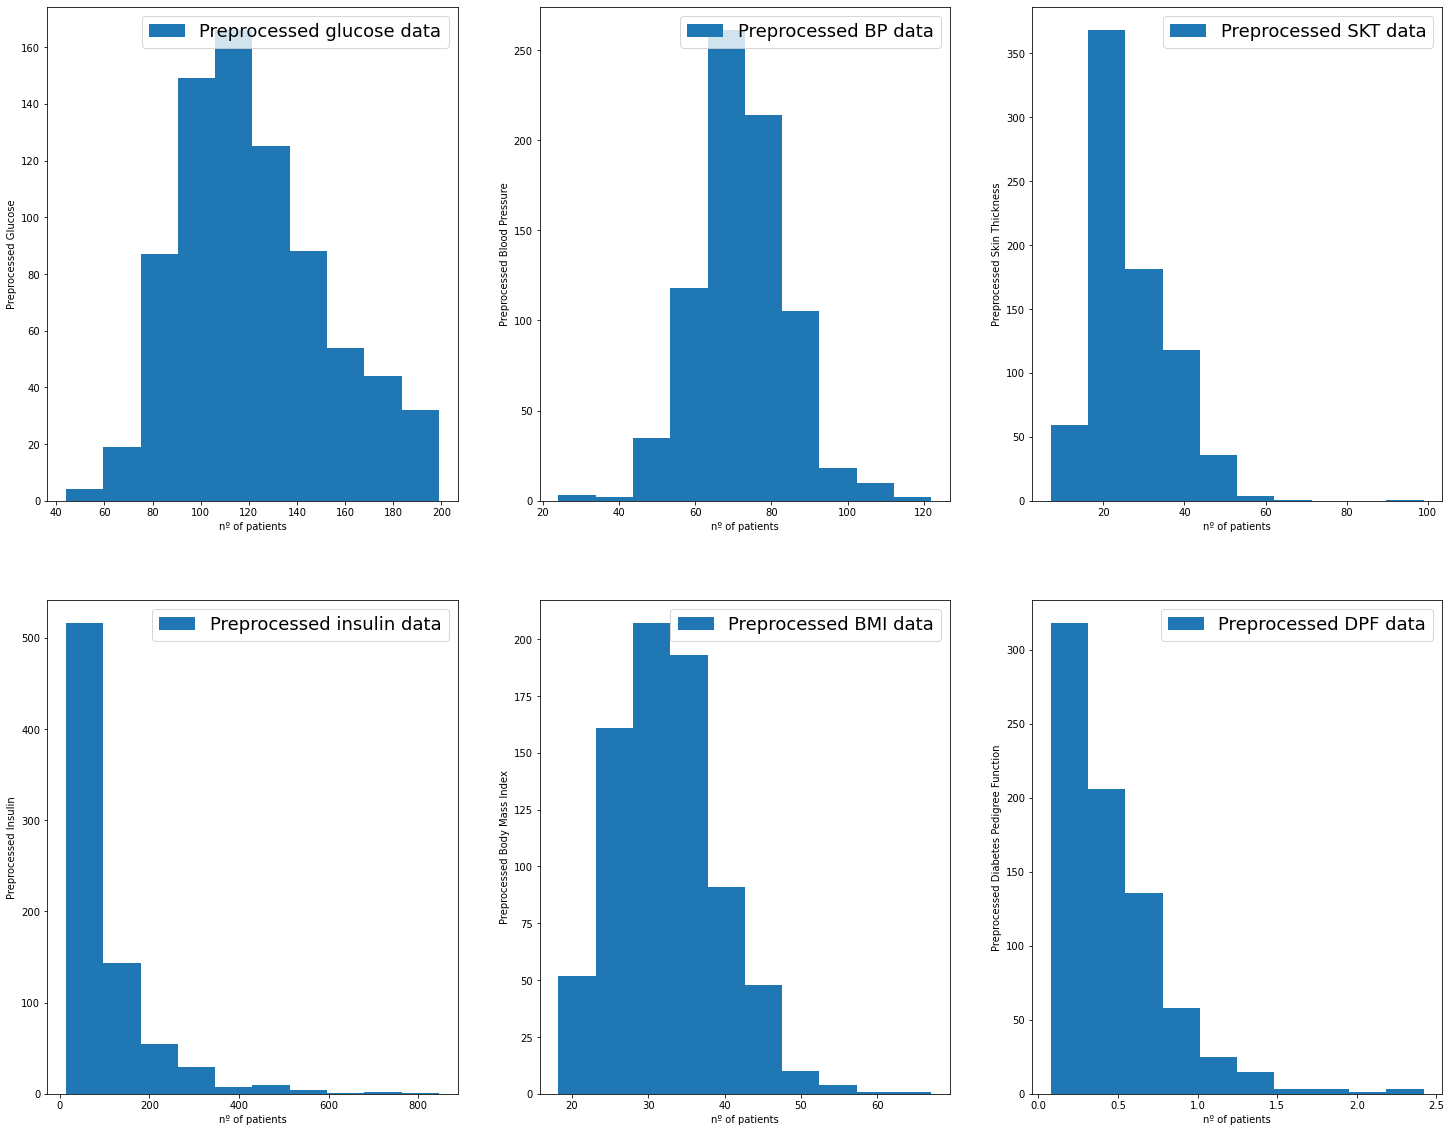

In [38]:
#VISUALIZATION PREPROCESSED VARIABLES
plt.figure(figsize = (25,20))

plt.subplot(2,3,1)
plt.hist(gluc_preprocessed,label = "Preprocessed glucose data")
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Glucose')

plt.subplot(2,3,2)
plt.hist(bp_preprocessed,label = "Preprocessed BP data")
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Blood Pressure')


plt.subplot(2,3,3)
plt.hist(SKT_preprocessed,label = "Preprocessed SKT data")
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Skin Thickness')


plt.subplot(2,3,4)
plt.hist(insulin_preprocessed,label = "Preprocessed insulin data")
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Insulin')

plt.subplot(2,3,5)
plt.hist(BMI_preprocessed,label = "Preprocessed BMI data")
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Body Mass Index')

plt.subplot(2,3,6)
plt.hist(DPF_preprocessed,label = "Preprocessed DPF data")
plt.legend(prop={"size":18})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Diabetes Pedigree Function')

plt.show()

#### d2) Visualization-Comparison between original and preprocessed variables

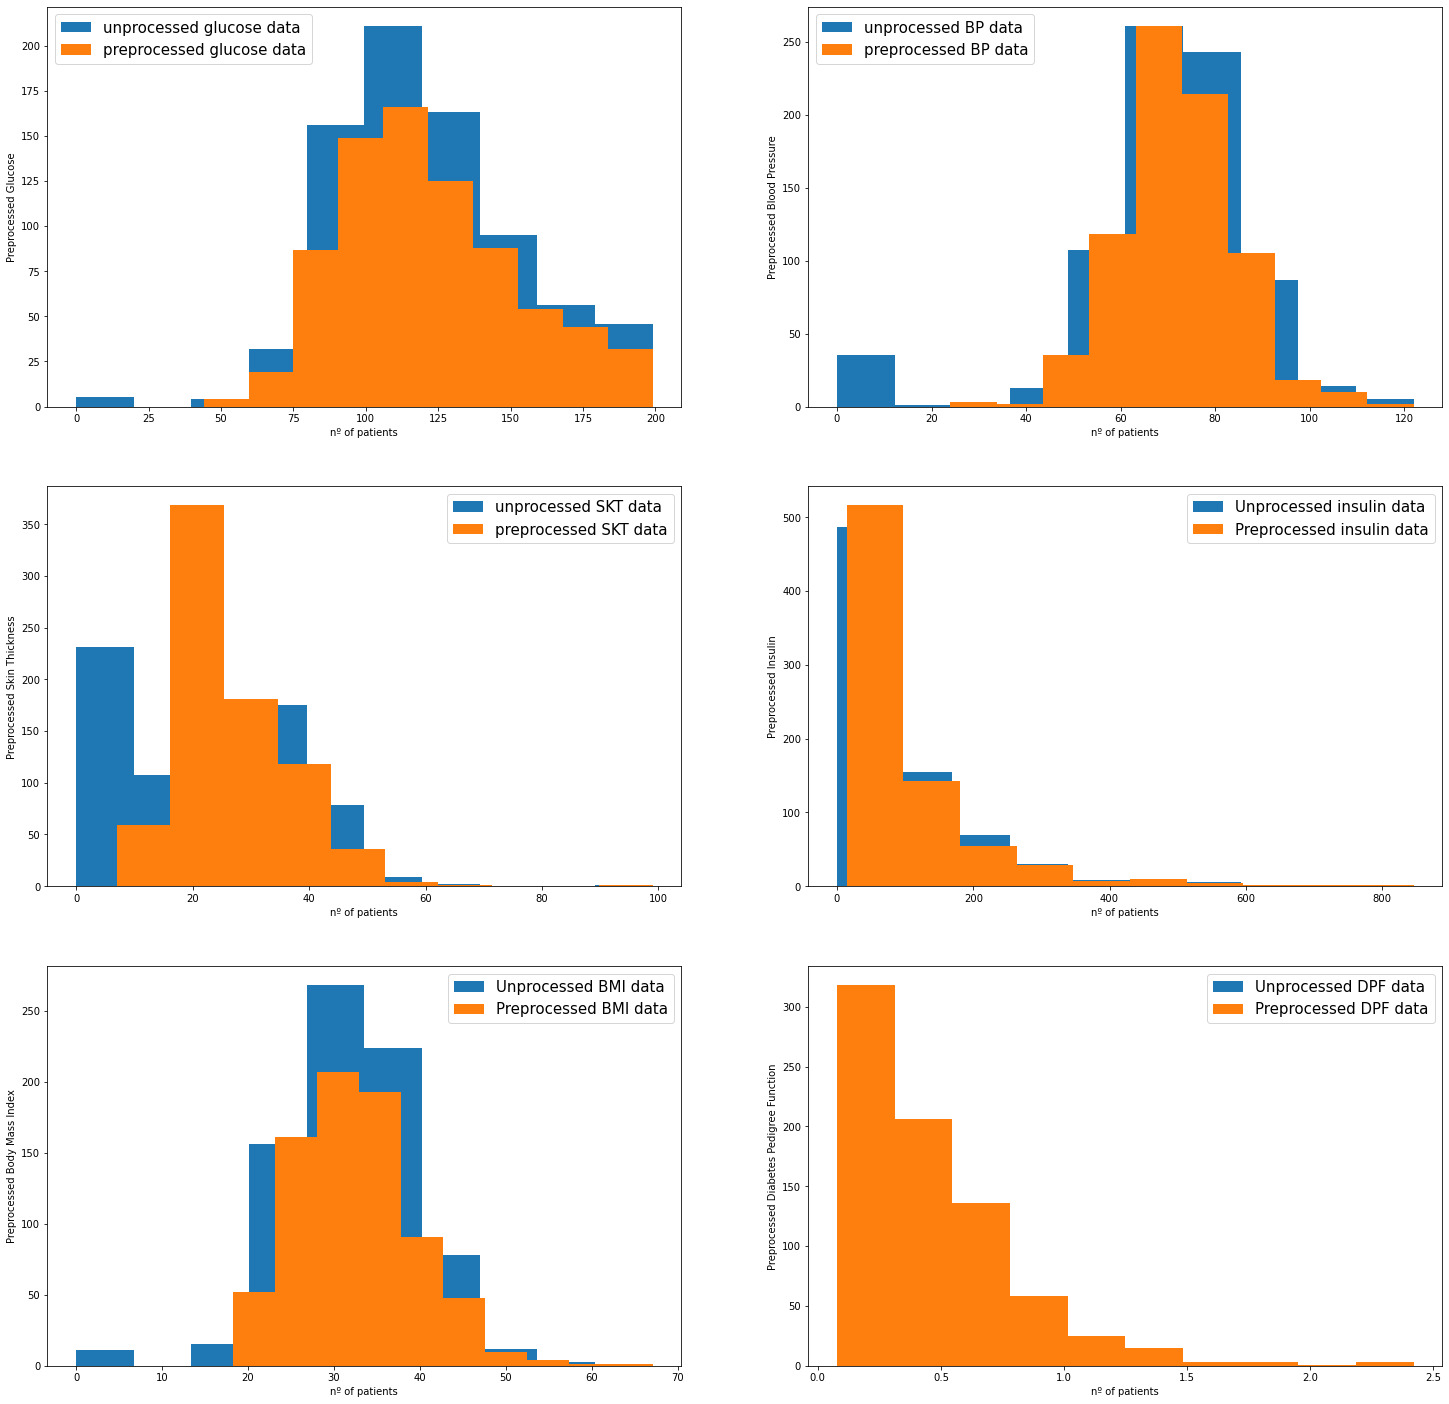

In [39]:
#VISUALIZATION OF COMPARISON ORIGINAL-PREPROCESSED VARIABLES
plt.figure(figsize = (25,25))

plt.subplot(3,2,1)

plt.hist(data['Glucose'], label = "unprocessed glucose data")
plt.hist(gluc_preprocessed, label = "preprocessed glucose data")
plt.legend(prop={"size":15})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Glucose')

plt.subplot(3,2,2)
plt.hist(data['BloodPressure'], label = "unprocessed BP data")
plt.hist(bp_preprocessed, label = "preprocessed BP data")
plt.legend(prop={"size":15})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Blood Pressure')


plt.subplot(3,2,3)
plt.hist(data['SkinThickness'], label = "unprocessed SKT data")
plt.hist(SKT_preprocessed, label = "preprocessed SKT data")
plt.legend(prop={"size":15})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Skin Thickness')


plt.subplot(3,2,4)
plt.hist(data['Insulin'], label = "Unprocessed insulin data")
plt.hist(insulin_preprocessed, label = "Preprocessed insulin data")
plt.legend(prop={"size":15})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Insulin')

plt.subplot(3,2,5)
plt.hist(data['BMI'], label = "Unprocessed BMI data")
plt.hist(BMI_preprocessed, label = "Preprocessed BMI data")
plt.legend(prop={"size":15})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Body Mass Index')

plt.subplot(3,2,6)
plt.hist(data['DiabetesPedigreeFunction'], label = "Unprocessed DPF data")
plt.hist(DPF_preprocessed, label="Preprocessed DPF data")
plt.legend(prop={"size":15})
plt.xlabel('nº of patients')
plt.ylabel('Preprocessed Diabetes Pedigree Function')

plt.show()

e) Consider the two types of normalization seen in theory: min-max normalization and standardization to obtain a normalized data set. View the histograms of two variables considering the two previous types of normalization. Justify the results obtained as well as the advantages and disadvantages of each type of standardization.

   #### e1) Normalization of glucose

In [40]:
#Standardization of glucose variable
z_norm_gl = []
mean_gluc = np.mean(gluc_preprocessed)
std_gluc = np.std(gluc_preprocessed)

for i in gluc_preprocessed:
    z_gl = (i-mean_gluc)/std_gluc
    z_norm_gl.append(z_gl)

#Min-Max normalization
glucose_minmax = []
min_gluc = min(gluc_preprocessed)
max_gluc = max(gluc_preprocessed)

for i in gluc_preprocessed:
    maxmin_gluc = (i-min_gluc)/(max_gluc - min_gluc)
    glucose_minmax.append(maxmin_gluc)
    

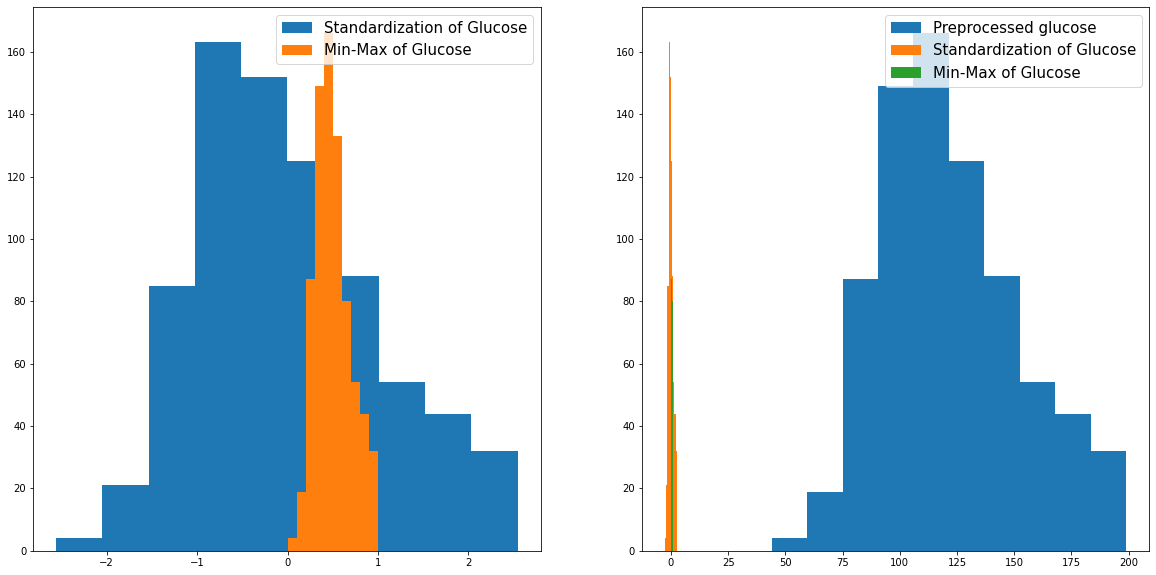

In [41]:
#Comparison between both normalization methods
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.hist(z_norm_gl, label = "Standardization of Glucose")
plt.hist(glucose_minmax, label = "Min-Max of Glucose")
plt.legend(prop={"size":15})


plt.subplot(1,2,2)
plt.hist(gluc_preprocessed, label="Preprocessed glucose")
plt.hist(z_norm_gl, label = "Standardization of Glucose")
plt.hist(glucose_minmax, label = "Min-Max of Glucose")
plt.legend(prop={"size":15})


#in the right histogram, there's a very green thin line representing the min-max normalization method

  #### e2) Normalization of blood pressure

In [42]:
#Standardization of blood pressure variable

z_norm_bp = []
mean_bp = np.mean(bp_preprocessed)
std_bp = np.std(bp_preprocessed)

for i in bp_preprocessed:
    z_bp = (i-mean_bp)/std_bp
    z_norm_bp.append(z_bp)
    
    
#Min-Max normalization
BP_minmax = []
min_BP = min(bp_preprocessed)
max_BP = max(bp_preprocessed)

for i in bp_preprocessed:
    maxmin_BP = (i-min_BP)/(max_BP - min_BP)
    BP_minmax.append(maxmin_BP)

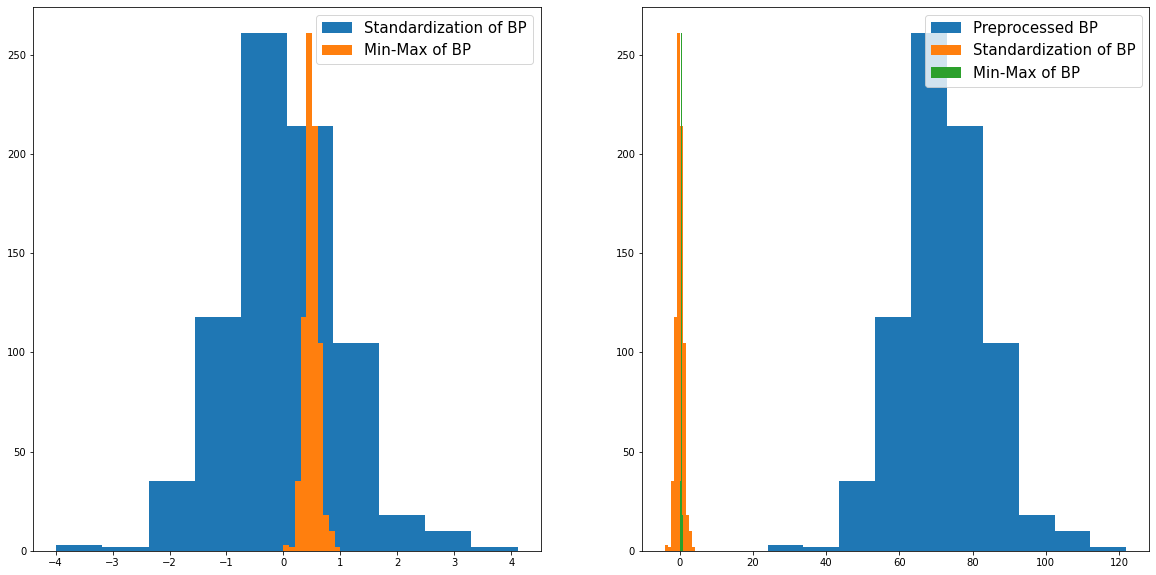

In [43]:
#Comparison between both normalization methods
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.hist(z_norm_bp, label = "Standardization of BP")
plt.hist(BP_minmax, label = "Min-Max of BP")
plt.legend(prop={"size":15})


plt.subplot(1,2,2)
plt.hist(bp_preprocessed, label="Preprocessed BP")
plt.hist(z_norm_bp, label = "Standardization of BP")
plt.hist(BP_minmax, label = "Min-Max of BP")
plt.legend(prop={"size":15})


#in the right histogram, there's a very green thin line representing the min-max normalization method

f) Consider the feature called Output. Indicate if the classes are unbalanced. If they are, indicate what you should do to address this issue

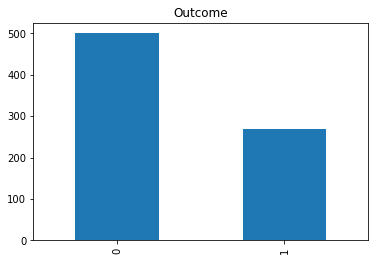

In [44]:
#Plot the number of cases (with diabetes) and control (with no diabetes)
data['Outcome'].value_counts().plot.bar(title="Outcome")

## 2.3 Training, validation and test subsets

In this section, the available cases will be separated into two subsets: a training subset and a test subset. The subsets will not share any case in common. The training subset will be used in the next modules to perform the learning of some models, and the test subset to evaluate their performance.

Before perform the separation into subsets, respond in a reasoned manner (justifying your response) to the following issues:

a) What percentage of available cases will you consider in the training subset? And in the test subset?

80% of the data for training/20% of data for testing (after the model has been established) or 70/30

b) Consider that you build a binary classifier (two classes, C1 and C2). Discuss what would happen when evaluating the classifier's performance if the training subset with which the classifier is designed had almost all the cases of class C1 and the test subset had almost all the cases of class C2.

c) How could you avoid overtraining in the design of the classifier? What would be the
process to be followed to find the best parameters of that model?


d) Explain which tools, from those presented in the course, you would use to roughly check whether each variable in the test subset follows the same distribution as the corresponding variable in the training subset.

e) Discuss what you should do with the original data set if you find that the distribution
of the test subset cases is different from the distribution of the
training subset.